Upload dataset

In [ ]:
#Import datset, show first lines
#Import dataset
import csv
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Check if the file has been uploaded
file_name = next(iter(uploaded))

# Initialize an empty list to store the rows
data = []

# Open the CSV file and handle the delimiter
with open(file_name, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')

    # Skip the header row if needed
    # next(reader)  # Uncomment this line if the first row is the header

    # Append each row to the data list
    for row in reader:
        data.append(row)

# Create a Pandas DataFrame from the data
df = pd.DataFrame(data[1:], columns=data[0])

# Display the first few rows of the dataset
print(df.head())

# Check data types and missing values
print(df.info())

Saving tweets_remaining_09042020_16072020.csv to tweets_remaining_09042020_16072020.csv
  id                 created_at  \
0  1  2020-04-09 23:59:51+00:00   
1  2  2020-04-09 23:58:55+00:00   
2  3  2020-04-09 23:58:52+00:00   
3  4  2020-04-09 23:58:27+00:00   
4  5  2020-04-09 23:57:59+00:00   

                                           full_text  
0  @KennyDegu very very little volume. With $10T ...  
1  #ES_F achieved Target 2780 closing above 50% #...  
2  RT @KimbleCharting: Silver/Gold indicator crea...  
3  @Issaquahfunds Hedged our $MSFT position into ...  
4  RT @zipillinois: 3 Surprisingly Controversial ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923673 entries, 0 to 923672
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          923673 non-null  object
 1   created_at  923673 non-null  object
 2   full_text   923673 non-null  object
dtypes: object(3)
memory usage: 21.1+ MB
None


In [2]:
# Preprocessing the dataset. Used Stemming Steps. Saved file removing not preprocessed tweets (column 'full_text').
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

# Read the uploaded CSV file
uploaded_file_name = "tweets_remaining_09042020_16072020.csv"
df = pd.read_csv(uploaded_file_name, delimiter=';')

# Download stopwords and initialize the stemmer
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Step 1: Tokenization
df['PreProcStem'] = df['full_text'].apply(lambda text: ' '.join(word_tokenize(text)))

# Step 2: Stop word removal
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))

# Step 3: Short words removal (less than 3 characters)
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: ' '.join([word for word in text.split() if len(word) > 2]))

# Step 4: Case conversion (convert all to lowercase)
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: text.lower())

# Step 5: Stemming
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))

# Step 6: Symbol removal
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: re.sub(r'[@$#\'.",!?():]', '', text))

# Step 7: Remove digits
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: re.sub(r'\d+', '', text))

# Step 8: Remove URLs and HTTP/HTTPS links
import re

# Assuming 'PreProcStem' is the column containing the text data
df['PreProcStem'] = df['PreProcStem'].apply(lambda text: re.sub(r'http[s]?://\S+', '', text))

# Save the preprocessed DataFrame to a CSV file with and without the original "full_text" column
preprocessed_file_name = "PreProc_Stem.csv"
preprocessed_no_text_column_file_name = "PreProc_Stem.csv"
df.to_csv(preprocessed_file_name, index=False)
df.drop(columns=['full_text'], inplace=True)  # Drop the "full_text" column
df.to_csv(preprocessed_no_text_column_file_name, index=False)

# Print the first 5 lines of the preprocessed DataFrame
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   id                 created_at  \
0   1  2020-04-09 23:59:51+00:00   
1   2  2020-04-09 23:58:55+00:00   
2   3  2020-04-09 23:58:52+00:00   
3   4  2020-04-09 23:58:27+00:00   
4   5  2020-04-09 23:57:59+00:00   

                                         PreProcStem  
0  kennydegu littl volum with t think could spx t...  
1  es_f achiev target  close fibonacci level mome...  
2  kimblechart silver/gold indic creat one larges...  
3  issaquahfund hedg msft posit close seem get la...  
4  zipillinoi surprisingli controversi stock dona...  


In [4]:
#Clean blanks, remaining http - Stemming
import pandas as pd

# Read the CSV file with comma delimiter
input_file_name = "PreProc_Stem.csv"
df = pd.read_csv(input_file_name, delimiter=',')

# Check the column names
print(df.columns)

# Remove 'http' from the 'PreProcStem' column
df['PreProcStem'] = df['PreProcStem'].str.replace('http', '', regex=False)

# Check for and remove blank lines
df.dropna(subset=['PreProcStem'], inplace=True)

# Save the DataFrame to a new CSV file without blank lines
output_file_name = "PreProc_Stem_cleaned.csv"
df.to_csv(output_file_name, index=False, sep=',')


Index(['id', 'created_at', 'PreProcStem'], dtype='object')


In [5]:
#Preprocessing using Lemmatization
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Read the uploaded CSV file
uploaded_file_name = "tweets_remaining_09042020_16072020.csv"
df = pd.read_csv(uploaded_file_name, delimiter=';')

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Stop words set
stop_words = set(stopwords.words('english'))

# Preprocessing steps
df['PreProcLemm'] = df['full_text'].apply(lambda text: ' '.join(word_tokenize(text)))
df['PreProcLemm'] = df['PreProcLemm'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))
df['PreProcLemm'] = df['PreProcLemm'].apply(lambda text: ' '.join([word for word in text.split() if len(word) > 2]))
df['PreProcLemm'] = df['PreProcLemm'].apply(lambda text: text.lower())
df['PreProcLemm'] = df['PreProcLemm'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))
df['PreProcLemm'] = df['PreProcLemm'].apply(lambda text: re.sub(r'[@$#\'.",!?():]', '', text))
df['PreProcLemm'] = df['PreProcLemm'].apply(lambda text: re.sub(r'\d+', '', text))
df['PreProcLemm'] = df['PreProcLemm'].apply(lambda text: re.sub(r'http[s]?://\S+', '', text))

# Save the preprocessed DataFrame
preprocessed_file_name = "PreProc_Lemm.csv"
df.to_csv(preprocessed_file_name, index=False)

# Optionally, drop the "full_text" column and save
df.drop(columns=['full_text'], inplace=True)
df.to_csv(preprocessed_file_name, index=False)

# Print the first 5 lines
print(df.head())


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   id                 created_at  \
0   1  2020-04-09 23:59:51+00:00   
1   2  2020-04-09 23:58:55+00:00   
2   3  2020-04-09 23:58:52+00:00   
3   4  2020-04-09 23:58:27+00:00   
4   5  2020-04-09 23:57:59+00:00   

                                         PreProcLemm  
0  kennydegu little volume with t think could spx...  
1  es_f achieved target  closing fibonacci level ...  
2  kimblecharting silver/gold indicator creates o...  
3  issaquahfunds hedged msft position close seeme...  
4  zipillinois surprisingly controversial stock d...  


In [6]:
#Clean blanks, remaining words - Lemmatization
import pandas as pd

# Read the CSV file with comma delimiter
input_file_name = "PreProc_Lemm.csv"
df = pd.read_csv(input_file_name, delimiter=',')

# Check the column names
print(df.columns)

# Remove 'http' from the 'PreProcStem' column
df['PreProcLemm'] = df['PreProcLemm'].str.replace('http', '', regex=False)

# Check for and remove blank lines
df.dropna(subset=['PreProcLemm'], inplace=True)

# Save the DataFrame to a new CSV file without blank lines
output_file_name = "PreProc_Lemm_cleaned.csv"
df.to_csv(output_file_name, index=False, sep=',')

Index(['id', 'created_at', 'PreProcLemm'], dtype='object')


In [8]:
# Statistics in preprocessed dataset - Stem
uploaded_file_name = "PreProc_Stem_cleaned.csv"
df = pd.read_csv(uploaded_file_name)

# Number of tweets in the dataset
num_tweets = len(df)

# Average tweet length (in characters or words)
df['tweet_length_chars'] = df['PreProcStem'].dropna().apply(len)
df['tweet_length_words'] = df['PreProcStem'].dropna().str.split().apply(len)
avg_tweet_length_chars = df['tweet_length_chars'].mean()
avg_tweet_length_words = df['tweet_length_words'].mean()

# Most active users/authors
most_active_users = df['id'].value_counts().head()

# Most common hashtags and mentions
hashtags = df['PreProcStem'].str.findall(r'#\w+').explode().value_counts().head()
mentions = df['PreProcStem'].str.findall(r'@\w+').explode().value_counts().head()

# Print the computed statistics
print(f"Number of tweets: {num_tweets}")
print(f"Average tweet length (characters): {avg_tweet_length_chars:.2f}")
print(f"Average tweet length (words): {avg_tweet_length_words:.2f}")
print("\nMost active users/authors:")
print(most_active_users)
print("\nMost common hashtags:")
print(hashtags)
print("\nMost common mentions:")
print(mentions)


Number of tweets: 923612
Average tweet length (characters): 99.88
Average tweet length (words): 15.26

Most active users/authors:
1         1
625741    1
625772    1
625773    1
625774    1
Name: id, dtype: int64

Most common hashtags:
Series([], Name: PreProcStem, dtype: int64)

Most common mentions:
Series([], Name: PreProcStem, dtype: int64)


In [7]:
# Statistics in preprocessed dataset - Lemm
uploaded_file_name = "PreProc_Lemm_cleaned.csv"
df = pd.read_csv(uploaded_file_name)

# Number of tweets in the dataset
num_tweets = len(df)

# Average tweet length (in characters or words)
df['tweet_length_chars'] = df['PreProcLemm'].dropna().apply(len)
df['tweet_length_words'] = df['PreProcLemm'].dropna().str.split().apply(len)
avg_tweet_length_chars = df['tweet_length_chars'].mean()
avg_tweet_length_words = df['tweet_length_words'].mean()

# Most active users/authors
most_active_users = df['id'].value_counts().head()

# Most common hashtags and mentions
hashtags = df['PreProcLemm'].str.findall(r'#\w+').explode().value_counts().head()
mentions = df['PreProcLemm'].str.findall(r'@\w+').explode().value_counts().head()

# Print the computed statistics
print(f"Number of tweets: {num_tweets}")
print(f"Average tweet length (characters): {avg_tweet_length_chars:.2f}")
print(f"Average tweet length (words): {avg_tweet_length_words:.2f}")
print("\nMost active users/authors:")
print(most_active_users)
print("\nMost common hashtags:")
print(hashtags)
print("\nMost common mentions:")
print(mentions)


Number of tweets: 923613
Average tweet length (characters): 107.15
Average tweet length (words): 15.27

Most active users/authors:
1         1
625741    1
625772    1
625773    1
625774    1
Name: id, dtype: int64

Most common hashtags:
Series([], Name: PreProcLemm, dtype: int64)

Most common mentions:
Series([], Name: PreProcLemm, dtype: int64)


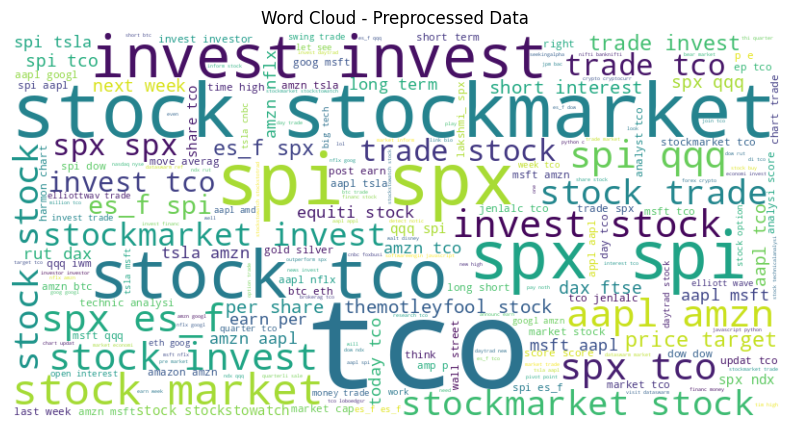

In [9]:
#Word Cloud (after preprocessing - Stemming
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the cleaned CSV file
uploaded_file_name = "PreProc_Stem_cleaned.csv"
df = pd.read_csv(uploaded_file_name, delimiter=',')

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(df['PreProcStem']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Preprocessed Data")
plt.show()

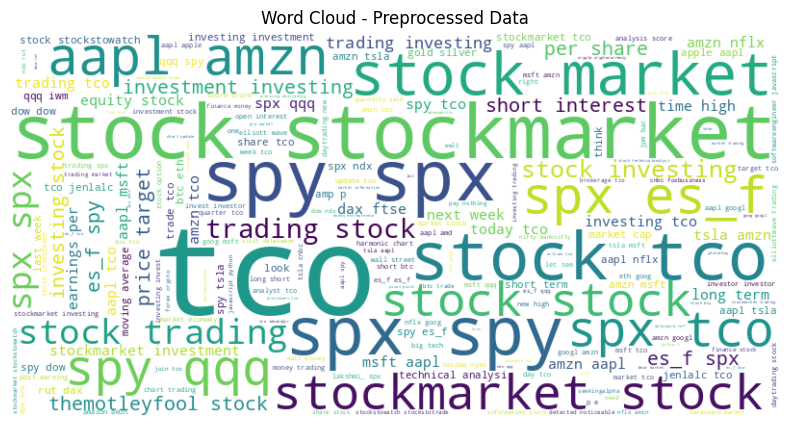

In [10]:
#Word Cloud (after preprocessing - Lemmatization)
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the cleaned CSV file
uploaded_file_name = "PreProc_Lemm_cleaned.csv"
df = pd.read_csv(uploaded_file_name, delimiter=',')

# Create a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(' '.join(df['PreProcLemm']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Preprocessed Data")
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


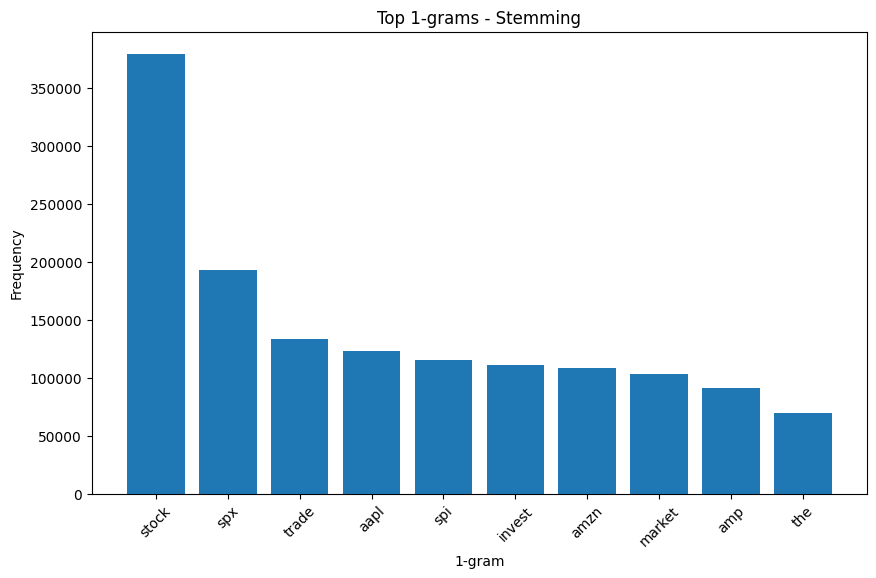

In [14]:
#N-grams - Stemming
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')

# Load the cleaned CSV file
input_file_name = "PreProc_Stem_cleaned.csv"
df = pd.read_csv(input_file_name)

# Tokenize the text from the 'PreProcStem' column and join it into a single string
words = ' '.join(df['PreProcStem']).split()

# Create a list of n-grams (e.g., bigrams, trigrams)
n = 1  # Change n to 3 for trigrams
n_grams = [' '.join(gram) for gram in ngrams(words, n)]

# Count the frequencies of n-grams
n_gram_freq = Counter(n_grams)

# Get the most common n-grams and their frequencies
most_common_ngrams = n_gram_freq.most_common(10)

# Extract n-grams and their frequencies
ngram, frequency = zip(*most_common_ngrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ngram, frequency)
plt.title(f"Top {n}-grams - Stemming")
plt.xlabel(f"{n}-gram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


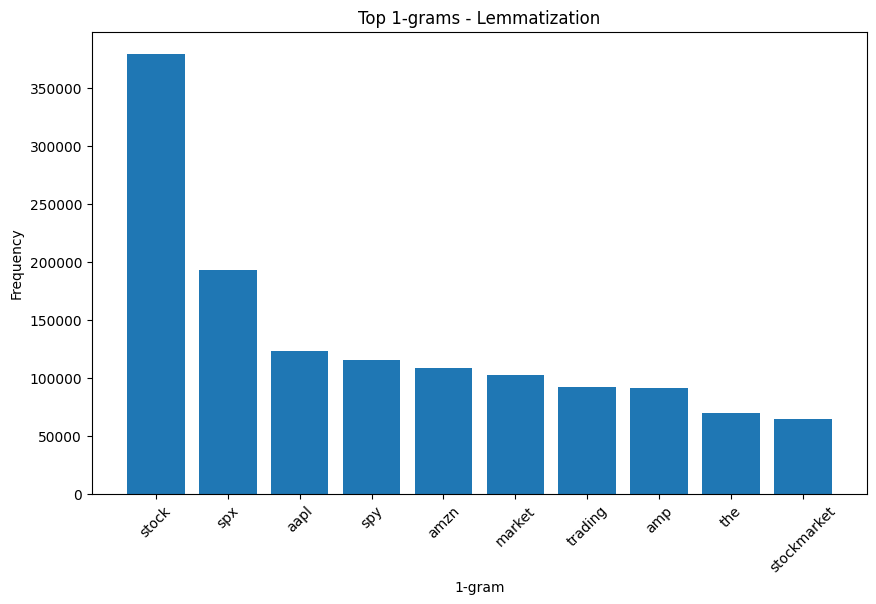

In [13]:
#N-grams - Lemmatization
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')

# Load the cleaned CSV file
input_file_name = "PreProc_Lemm_cleaned.csv"
df = pd.read_csv(input_file_name)

# Tokenize the text from the 'PreProcStem' column and join it into a single string
words = ' '.join(df['PreProcLemm']).split()

# Create a list of n-grams (e.g., bigrams, trigrams)
n = 1  # Change n to 3 for trigrams
n_grams = [' '.join(gram) for gram in ngrams(words, n)]

# Count the frequencies of n-grams
n_gram_freq = Counter(n_grams)

# Get the most common n-grams and their frequencies
most_common_ngrams = n_gram_freq.most_common(10)

# Extract n-grams and their frequencies
ngram, frequency = zip(*most_common_ngrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ngram, frequency)
plt.title(f"Top {n}-grams - Lemmatization")
plt.xlabel(f"{n}-gram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


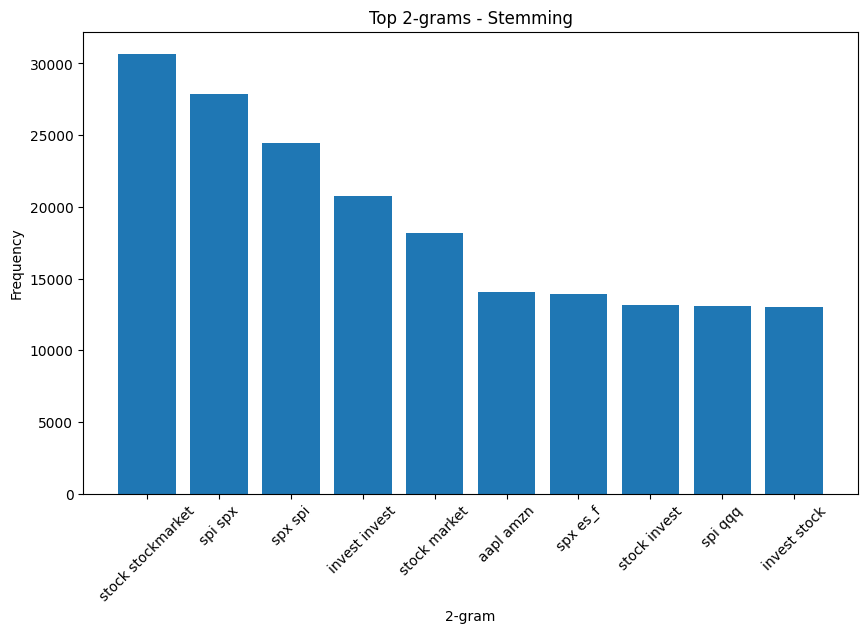

In [15]:
#Bigrams (preprocessed dataset - Stemming)
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')

# Load the cleaned CSV file
input_file_name = "PreProc_Stem_cleaned.csv"
df = pd.read_csv(input_file_name)

# Tokenize the text from the 'PreProcStem' column and join it into a single string
words = ' '.join(df['PreProcStem']).split()

# Create a list of bigrams
n = 2  # Change n to 2 for bigrams
bigrams = list(ngrams(words, n))

# Count the frequencies of bigrams
bigram_freq = Counter(bigrams)

# Get the most common bigrams and their frequencies
most_common_bigrams = bigram_freq.most_common(10)  # Change 10 to the number of bigrams you want to display

# Extract bigrams and their frequencies
bigram, frequency = zip(*most_common_bigrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar([' '.join(b) for b in bigram], frequency)
plt.title(f"Top {n}-grams - Stemming")
plt.xlabel(f"{n}-gram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


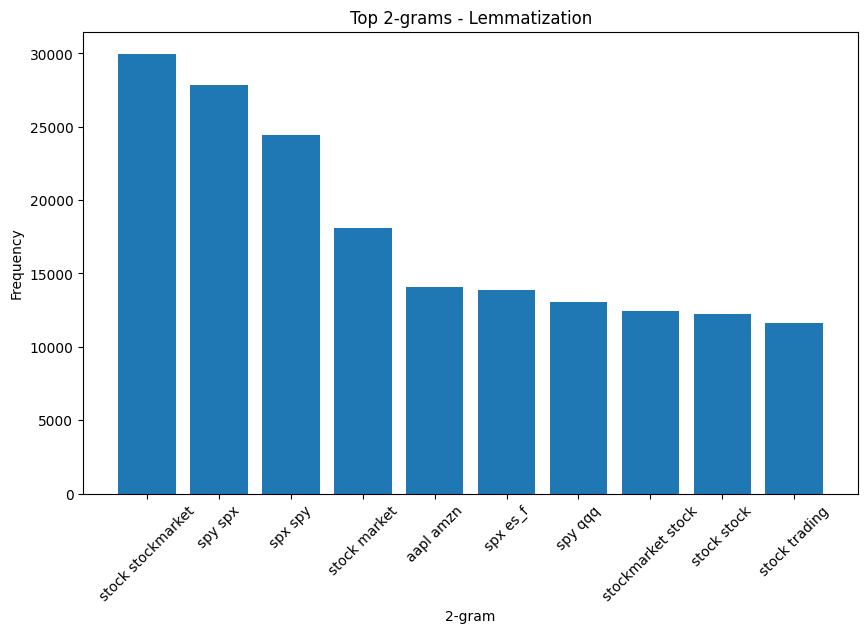

In [16]:
#Bigrams (preprocessed dataset - Lemmatization)
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')

# Load the cleaned CSV file
input_file_name = "PreProc_Lemm_cleaned.csv"
df = pd.read_csv(input_file_name)

# Tokenize the text from the 'PreProcStem' column and join it into a single string
words = ' '.join(df['PreProcLemm']).split()

# Create a list of bigrams
n = 2  # Change n to 2 for bigrams
bigrams = list(ngrams(words, n))

# Count the frequencies of bigrams
bigram_freq = Counter(bigrams)

# Get the most common bigrams and their frequencies
most_common_bigrams = bigram_freq.most_common(10)  # Change 10 to the number of bigrams you want to display

# Extract bigrams and their frequencies
bigram, frequency = zip(*most_common_bigrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar([' '.join(b) for b in bigram], frequency)
plt.title(f"Top {n}-grams - Lemmatization")
plt.xlabel(f"{n}-gram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


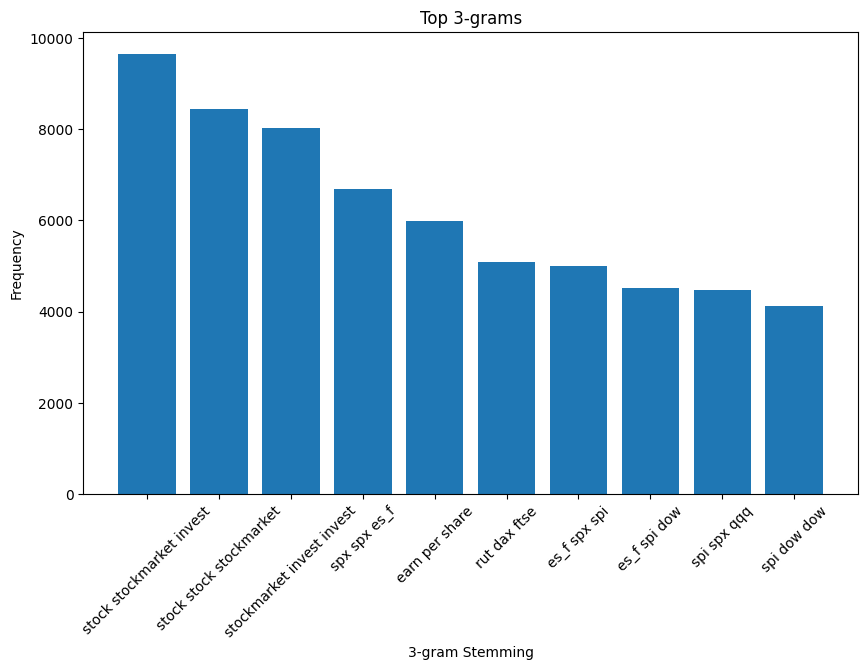

In [17]:
#trigrams (preprocessed dataset - Stemming)
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')

# Load the cleaned CSV file
input_file_name = "PreProc_Stem_cleaned.csv"
df = pd.read_csv(input_file_name)

# Tokenize the text from the 'PreProcStem' column and join it into a single string
words = ' '.join(df['PreProcStem']).split()

# Create a list of bigrams
n = 3  # Change n to 2 for bigrams
bigrams = list(ngrams(words, n))

# Count the frequencies of bigrams
bigram_freq = Counter(bigrams)

# Get the most common bigrams and their frequencies
most_common_bigrams = bigram_freq.most_common(10)  # number of bigrams you want to display

# Extract bigrams and their frequencies
bigram, frequency = zip(*most_common_bigrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar([' '.join(b) for b in bigram], frequency)
plt.title(f"Top {n}-grams")
plt.xlabel(f"{n}-gram Stemming")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


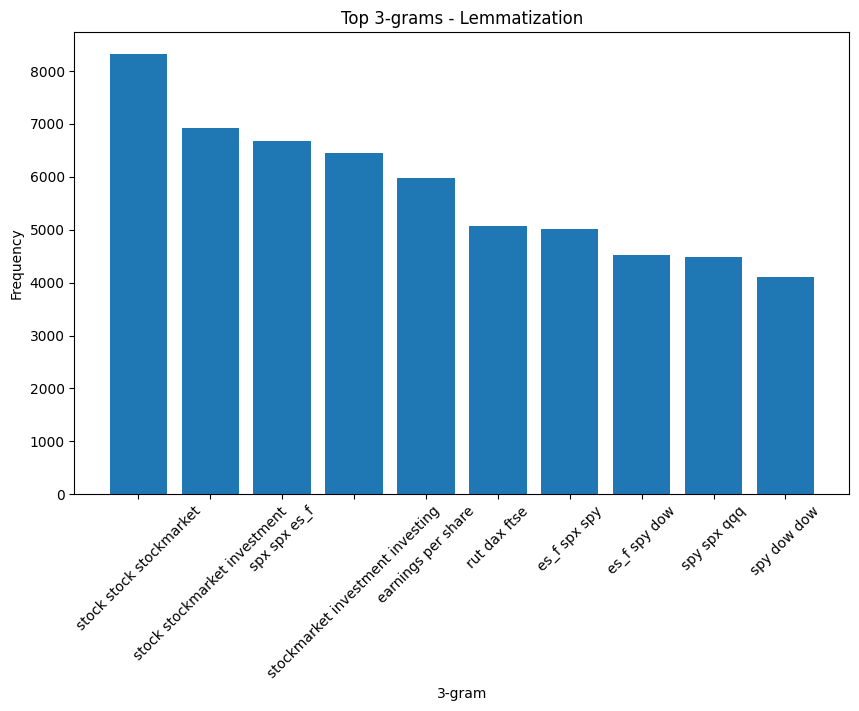

In [18]:
#trigrams (preprocessed dataset - Lemmatization)
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.util import ngrams
import nltk
nltk.download('punkt')

# Load the cleaned CSV file
input_file_name = "PreProc_Lemm_cleaned.csv"
df = pd.read_csv(input_file_name)

# Tokenize the text from the 'PreProcStem' column and join it into a single string
words = ' '.join(df['PreProcLemm']).split()

# Create a list of bigrams
n = 3  # Change n to 3 for trigrams
bigrams = list(ngrams(words, n))

# Count the frequencies of bigrams
bigram_freq = Counter(bigrams)

# Get the most common bigrams and their frequencies
most_common_bigrams = bigram_freq.most_common(10)  # number of bigrams you want to display

# Extract bigrams and their frequencies
bigram, frequency = zip(*most_common_bigrams)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar([' '.join(b) for b in bigram], frequency)
plt.title(f"Top {n}-grams - Lemmatization")
plt.xlabel(f"{n}-gram")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


VADER - Stemming

In [19]:
!pip install pandas nltk


In [20]:
#Apply VADER on dataset - Stemming
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load your dataset
df = pd.read_csv('PreProc_Stem_cleaned.csv')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis
df['sentiment_scores'] = df['PreProcStem'].apply(get_sentiment_scores)

# Optionally, extract specific scores like 'compound' into a separate column
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Save the DataFrame with sentiment analysis results to a CSV file
df.to_csv('PreProc_Stem_VADER.csv', index=False)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


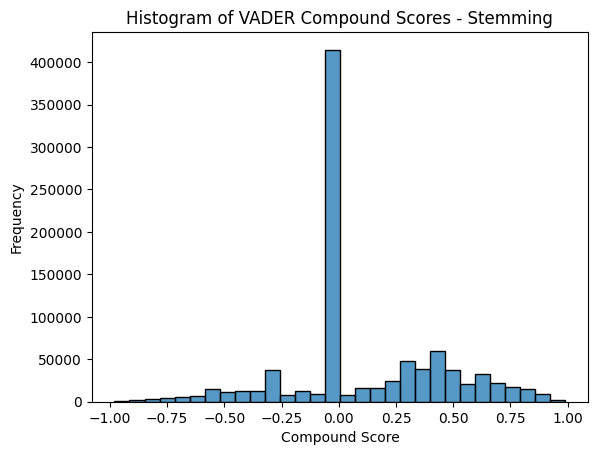

In [25]:
#Histogram - VADER - Stemming
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the file where VADER results are saved
# Replace 'path_to_your_file/PreProc_Stem_VADER.csv' with the path to your file
df = pd.read_csv('PreProc_Stem_VADER.csv')

# Creating a histogram of the compound scores
sns.histplot(df['compound_score'], bins=30)

# Setting the title and labels for the histogram
plt.title('Histogram of VADER Compound Scores - Stemming')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

# Display the histogram
plt.show()


VADER - Lemmatization

In [22]:
#Apply VADER on dataset - Lemmatization
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load your dataset
df = pd.read_csv('PreProc_Lemm_cleaned.csv')

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis
df['sentiment_scores'] = df['PreProcLemm'].apply(get_sentiment_scores)

# Optionally, extract specific scores like 'compound' into a separate column
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Save the DataFrame with sentiment analysis results to a CSV file
df.to_csv('PreProc_Lemm_VADER.csv', index=False)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


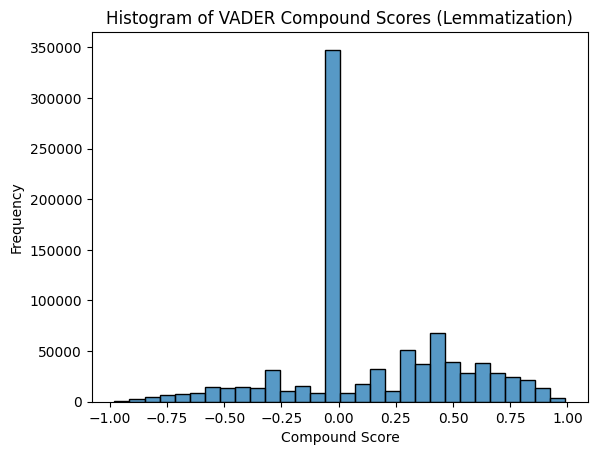

In [24]:
#Histogram - VADER - Lemmatization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the file where VADER results are saved
# Replace 'path_to_your_file/PreProc_Stem_VADER.csv' with the path to your file
df = pd.read_csv('PreProc_Lemm_VADER.csv')

# Creating a histogram of the compound scores
sns.histplot(df['compound_score'], bins=30)

# Setting the title and labels for the histogram
plt.title('Histogram of VADER Compound Scores (Lemmatization)')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

Format - dates - Stemming

In [26]:
#Format created_at to bring date yyyy-mm-dd only (no hour) - Stemming
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_VADER.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the date (yyyy-mm-dd) and store it in the 'created_at' column
df['created_at'] = df['created_at'].dt.date

# Save the updated DataFrame back to the CSV file
df.to_csv('PreProc_Stem_Vader.csv', index=False)

# Print the first 5 lines of the saved file
with open('PreProc_Stem_Vader.csv', 'r') as file:
    for i in range(5):
        print(file.readline().strip())



id,created_at,PreProcStem,sentiment_scores,compound_score
1,2020-04-09,kennydegu littl volum with t think could spx trade ,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0
2,2020-04-09,es_f achiev target  close fibonacci level momentum still possibl push toward - next week spx spi tradign futur  //tco/wdanc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0
3,2020-04-09,kimblechart silver/gold indic creat one largest bullish revers pattern decad test multi-decad suppor…,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0
4,2020-04-09,issaquahfund hedg msft posit close seem get lazi past week,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0


Format - Date - Lemmatization

In [29]:
#Format created_at to bring date yyyy-mm-dd only (no hour) - Lemmatized
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Lemm_VADER.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the date (yyyy-mm-dd) and store it in the 'created_at' column
df['created_at'] = df['created_at'].dt.date

# Save the updated DataFrame back to the CSV file
df.to_csv('PreProc_Lemm_Vader.csv', index=False)

# Print the first 5 lines of the saved file
with open('PreProc_Lemm_Vader.csv', 'r') as file:
    for i in range(5):
        print(file.readline().strip())

id,created_at,PreProcLemm,sentiment_scores,compound_score
1,2020-04-09,kennydegu little volume with t think could spx trading ,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0
2,2020-04-09,es_f achieved target  closing fibonacci level momentum still possible push towards - next week spx spy tradign future  //tco/wdanc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0
3,2020-04-09,kimblecharting silver/gold indicator creates one largest bullish reversal pattern decade testing multi-decade suppor…,"{'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.2732}",0.2732
4,2020-04-09,issaquahfunds hedged msft position close seemed getting lazy past week,"{'neg': 0.217, 'neu': 0.783, 'pos': 0.0, 'compound': -0.3612}",-0.3612


Remove Outliers, after applying VADER

In [17]:
#Remove outliers - VADER Stem
import pandas as pd

# Load the dataset
input_file = 'PreProc_Stem_Vader.csv'
output_file = 'PreProc_Stem_Vader_NoOutliers.csv'
data = pd.read_csv(input_file)

# Convert 'compound_score' column to numeric
data['compound_score'] = pd.to_numeric(data['compound_score'], errors='coerce')

# Calculate the 10th and 90th percentiles for 'compound_score'
percentile_10_compound = data['compound_score'].quantile(0.10)
percentile_90_compound = data['compound_score'].quantile(0.90)

# Apply the flooring and capping to remove outliers for 'compound_score'
data['compound_score'] = data['compound_score'].clip(percentile_10_compound, percentile_90_compound)

# Save the cleaned dataset to a new CSV file
data.to_csv(output_file, index=False)

print("Outliers removed and cleaned data saved to", output_file)


Outliers removed and cleaned data saved to PreProc_Stem_Vader_NoOutliers.csv


In [18]:
#Remove outliers - VADER Lemmatization
import pandas as pd

# Load the dataset
input_file = 'PreProc_Lemm_Vader.csv'
output_file = 'PreProc_Lemm_Vader_NoOutliers.csv'
data = pd.read_csv(input_file)

# Convert 'compound_score' column to numeric
data['compound_score'] = pd.to_numeric(data['compound_score'], errors='coerce')

# Calculate the 10th and 90th percentiles for 'compound_score'
percentile_10_compound = data['compound_score'].quantile(0.10)
percentile_90_compound = data['compound_score'].quantile(0.90)

# Apply the flooring and capping to remove outliers for 'compound_score'
data['compound_score'] = data['compound_score'].clip(percentile_10_compound, percentile_90_compound)

# Save the cleaned dataset to a new CSV file
data.to_csv(output_file, index=False)

print("Outliers removed and cleaned data saved to", output_file)

Outliers removed and cleaned data saved to PreProc_Lemm_Vader_NoOutliers.csv


Daily Sentiment - VADER Stemming

In [40]:
#Daily average sentiment - Stemming
import pandas as pd
import ast

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_Vader_NoOutliers.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

# Convert the 'sentiment_scores' column from string to a dictionary
df['sentiment_scores'] = df['sentiment_scores'].apply(ast.literal_eval)

# Calculate the average compound sentiment score for each day
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
daily_average_sentiment = df.groupby('created_at')['compound_score'].mean()

# Find the most frequent sentiment for each day
most_frequent_sentiment = df.groupby('created_at')['compound_score'].apply(lambda x: x.mode().iloc[0])

# Create a DataFrame with the results
result_df = pd.DataFrame({'Average_Sentiment': daily_average_sentiment, 'Most_Frequent_Sentiment': most_frequent_sentiment})

# Reset the index to have 'created_at' as a regular column
result_df.reset_index(inplace=True)

# Save the resulting DataFrame as 'PreProc_Stem_Vader_Daily.csv'
result_df.to_csv('PreProc_Stem_Vader_Daily.csv', index=False)

# Print the result
print(result_df)



    created_at  Average_Sentiment  Most_Frequent_Sentiment
0   2020-04-09           0.098312                      0.0
1   2020-04-10           0.116415                      0.0
2   2020-04-11           0.154387                      0.0
3   2020-04-12           0.128268                      0.0
4   2020-04-13           0.112586                      0.0
..         ...                ...                      ...
72  2020-07-12           0.140942                      0.0
73  2020-07-13           0.132272                      0.0
74  2020-07-14           0.135572                      0.0
75  2020-07-15           0.193035                      0.0
76  2020-07-16           0.141673                      0.0

[77 rows x 3 columns]


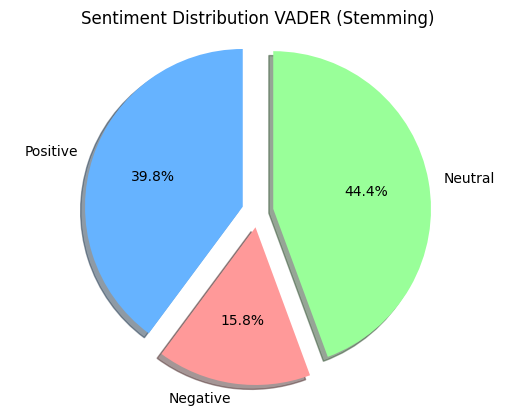

In [41]:
#Pie chart - average sentiment by day - VADER Stemming
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_Vader_NoOutliers.csv')

# Convert the 'sentiment_scores' column from string to a dictionary
df['sentiment_scores'] = df['sentiment_scores'].apply(ast.literal_eval)

# Extract the compound sentiment scores
compound_scores = df['sentiment_scores'].apply(lambda x: x['compound'])

# Determine the sentiment categories based on the compound scores
positive_count = (compound_scores > 0).sum()
negative_count = (compound_scores < 0).sum()
neutral_count = (compound_scores == 0).sum()

# Calculate the percentages
total_count = len(df)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Blue, Red, Green
explode = (0.1, 0.1, 0.1)  # Explode slices

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Sentiment Distribution VADER (Stemming)')
plt.show()


VADER - Daily - Lemmatization

In [26]:
#Daily average sentiment - Lemmatization
import pandas as pd
import ast

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Lemm_Vader_NoOutliers.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

# Convert the 'sentiment_scores' column from string to a dictionary
df['sentiment_scores'] = df['sentiment_scores'].apply(ast.literal_eval)

# Calculate the average compound sentiment score for each day
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])
daily_average_sentiment = df.groupby('created_at')['compound_score'].mean()

# Find the most frequent sentiment for each day
most_frequent_sentiment = df.groupby('created_at')['compound_score'].apply(lambda x: x.mode().iloc[0])

# Create a DataFrame with the results
result_df = pd.DataFrame({'Average_Sentiment': daily_average_sentiment, 'Most_Frequent_Sentiment': most_frequent_sentiment})

# Reset the index to have 'created_at' as a regular column
result_df.reset_index(inplace=True)

# Save the resulting DataFrame as 'PreProc_Stem_Vader_Daily.csv'
result_df.to_csv('PreProc_Lemm_Vader_Daily.csv', index=False)

# Print the result
print(result_df)



    created_at  Average_Sentiment  Most_Frequent_Sentiment
0   2020-04-09           0.115331                      0.0
1   2020-04-10           0.133237                      0.0
2   2020-04-11           0.158899                      0.0
3   2020-04-12           0.140915                      0.0
4   2020-04-13           0.129434                      0.0
..         ...                ...                      ...
72  2020-07-12           0.178717                      0.0
73  2020-07-13           0.166260                      0.0
74  2020-07-14           0.161524                      0.0
75  2020-07-15           0.225181                      0.0
76  2020-07-16           0.174682                      0.0

[77 rows x 3 columns]


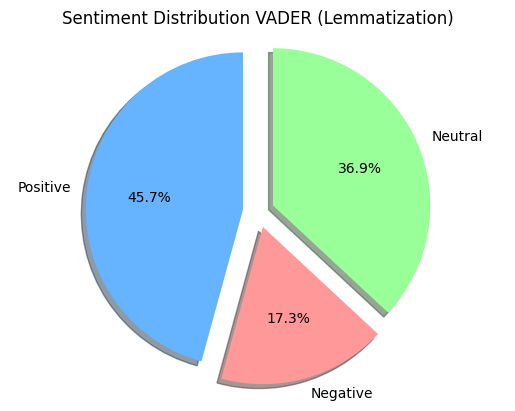

In [29]:
#Pie chart - average sentiment by day - VADER Lemmatized
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Lemm_Vader_NoOutliers.csv')

# Convert the 'sentiment_scores' column from string to a dictionary
df['sentiment_scores'] = df['sentiment_scores'].apply(ast.literal_eval)

# Extract the compound sentiment scores
compound_scores = df['sentiment_scores'].apply(lambda x: x['compound'])

# Determine the sentiment categories based on the compound scores
positive_count = (compound_scores > 0).sum()
negative_count = (compound_scores < 0).sum()
neutral_count = (compound_scores == 0).sum()

# Calculate the percentages
total_count = len(df)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Blue, Red, Green
explode = (0.1, 0.1, 0.1)  # Explode slices

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Sentiment Distribution VADER (Lemmatization)')
plt.show()

Confusion matrix: applied on datasets using Vader, only to compare Lemmatization and Stemming. Not possible to have an accuracy as datasets were classified using Vader, no ground truth to compare

In [28]:
#Confusion matrx
import pandas as pd

# Define a function to categorize the VADER compound scores
def categorize_score(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Load your datasets
df_stemmed = pd.read_csv('PreProc_Stem_Vader_NoOutliers.csv')
df_lemmatized = pd.read_csv('PreProc_Lemm_Vader_NoOutliers.csv')

# Categorize the compound scores
df_stemmed['vader_category'] = df_stemmed['compound_score'].apply(categorize_score)
df_lemmatized['vader_category'] = df_lemmatized['compound_score'].apply(categorize_score)

# Create a pseudo-confusion matrix to see where the classifications agree or disagree
# This is a simplistic comparison and should not be considered a true validation
comparison_df = pd.DataFrame({
    'Stemmed': df_stemmed['vader_category'],
    'Lemmatized': df_lemmatized['vader_category']
})

# Count the occurrences of each combination of categories
pseudo_confusion_matrix = comparison_df.groupby(['Stemmed', 'Lemmatized']).size().unstack(fill_value=0)

print(pseudo_confusion_matrix)


Lemmatized  negative  neutral  positive
Stemmed                                
negative       92116    21267     29650
neutral        37355   277575    102938
positive       26913    51030    284768


STOCK PRICE DATASET - S&P 500

In [35]:
#Upload S&P dataset
from google.colab import files

# Upload the dataset file
uploaded = files.upload()

Saving S&P500_2020_Apr_Jul.xlsx to S&P500_2020_Apr_Jul.xlsx


In [36]:
#Prepare stock prices dataset: date format, date column name to index, includes all dates from Apr09 to Jul 16, 2020, interpolate
import pandas as pd

# Load the dataset and ensure 'Date' is a datetime column
file_name = "S&P500_2020_Apr_Jul.xlsx"
df = pd.read_excel(file_name)
df['Date'] = pd.to_datetime(df['Date']).dt.date  # Extract date part and remove time

# Rename the 'Index' column to 'Date'
df.rename(columns={'Index': 'Date'}, inplace=True)

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the DataFrame to fill in missing dates
date_range = pd.date_range(start='2020-04-09', end='2020-07-16', freq='D')
df = df.reindex(date_range)

# Interpolate missing values using linear interpolation
df.interpolate(method='linear', inplace=True)

# Reset the index if needed
df.reset_index(inplace=True)

# Save the updated DataFrame to a new file
output_file_name = "S&P500_2020_Apr_Jul_with_Interpolation.xlsx"
df.to_excel(output_file_name, index=False)

# Check the first few rows of the updated DataFrame
print(df.head())

       index       Open       High        Low      Close  Adj Close  \
0 2020-04-09  2776.9900  2818.5700  2762.3600  2789.8200  2789.8200   
1 2020-04-10  2778.3575  2809.5425  2752.0625  2782.7725  2782.7725   
2 2020-04-11  2779.7250  2800.5150  2741.7650  2775.7250  2775.7250   
3 2020-04-12  2781.0925  2791.4875  2731.4675  2768.6775  2768.6775   
4 2020-04-13  2782.4600  2782.4600  2721.1700  2761.6300  2761.6300   

         Volume  
0  7.899550e+09  
1  7.254545e+09  
2  6.609540e+09  
3  5.964535e+09  
4  5.319530e+09  


In [ ]:
#Calculate StockChange
import pandas as pd

# Load the dataset from the existing file
file_name = "S&P500_2020_Apr_Jul_with_Interpolation.xlsx"
df = pd.read_excel(file_name)

# Calculate the 'StockChange' column
df['StockChange'] = (df['Close'] - df['Open']) / df['Open']

# Save the updated DataFrame to the same file
df.to_excel(file_name, index=False)

# Print the first few rows of the updated DataFrame
print(df.head())




       index       Open       High        Low      Close  Adj Close  \
0 2020-04-09  2776.9900  2818.5700  2762.3600  2789.8200  2789.8200   
1 2020-04-10  2778.3575  2809.5425  2752.0625  2782.7725  2782.7725   
2 2020-04-11  2779.7250  2800.5150  2741.7650  2775.7250  2775.7250   
3 2020-04-12  2781.0925  2791.4875  2731.4675  2768.6775  2768.6775   
4 2020-04-13  2782.4600  2782.4600  2721.1700  2761.6300  2761.6300   

         Volume  StockChange  
0  7.899550e+09     0.004620  
1  7.254545e+09     0.001589  
2  6.609540e+09    -0.001439  
3  5.964535e+09    -0.004464  
4  5.319530e+09    -0.007486  


Interpolation - S&P 500

In [37]:
# Variable Result_StockChange - the code loads a dataset, ensures that the 'Date' column contains
# only date values, fills in missing dates, interpolates missing values, resets the index if needed,
# saves the updated DataFrame to a new file, and prints the first few rows of the updated DataFrame.
# The overall goal is to clean and prepare the data for further analysis.

file_name = "S&P500_2020_Apr_Jul_with_Interpolation.xlsx"
df = pd.read_excel(file_name)

# Calculate the 'StockChange' column
df['StockChange'] = (df['Close'] - df['Open']) / df['Open']

# Define a function to calculate 'Result_StockChange' based on 'StockChange'
def calculate_result(stock_change):
    if stock_change > 0:
        return 1
    elif stock_change < 0:
        return -1
    else:
        return 0  # You can set this value for cases when stock_change is exactly zero

# Add the 'Result_StockChange' column based on 'StockChange'
df['Result_StockChange'] = df['StockChange'].apply(calculate_result)

# Save the updated DataFrame to the same file
df.to_excel(file_name, index=False)

# Print the first few rows of the updated DataFrame
print(df.head())

       index       Open       High        Low      Close  Adj Close  \
0 2020-04-09  2776.9900  2818.5700  2762.3600  2789.8200  2789.8200   
1 2020-04-10  2778.3575  2809.5425  2752.0625  2782.7725  2782.7725   
2 2020-04-11  2779.7250  2800.5150  2741.7650  2775.7250  2775.7250   
3 2020-04-12  2781.0925  2791.4875  2731.4675  2768.6775  2768.6775   
4 2020-04-13  2782.4600  2782.4600  2721.1700  2761.6300  2761.6300   

         Volume  StockChange  Result_StockChange  
0  7.899550e+09     0.004620                   1  
1  7.254545e+09     0.001589                   1  
2  6.609540e+09    -0.001439                  -1  
3  5.964535e+09    -0.004464                  -1  
4  5.319530e+09    -0.007486                  -1  


Dataset classified with VADER (Stemming), one sentiment defined by date, joins with stock dateset with Result_StockChange defined

In [38]:
#code combines data from two different sources (df1 and df2) by adding the 'Result_StockChange'
#column from df1 ("S&P500_2020_Apr_Jul_with_Interpolation.xlsx.") to df2 ("PreProc_Stem_Vader_Daily.csv.").
#Then, it saves the updated df2 DataFrame to a new CSV file for further
# analysis or storage.
import pandas as pd

# Load the data from both files
df1 = pd.read_excel("S&P500_2020_Apr_Jul_with_Interpolation.xlsx")
df2 = pd.read_csv("PreProc_Stem_Vader_Daily.csv")

# Copy the 'Result_StockChange' column from df1 to df2
df2['Result_StockChange'] = df1['Result_StockChange']

# Save the updated df2 back to a CSV file
df2.to_csv("mean_sentiment_by_date_VADER-Stem_updated.csv", index=False)


In [40]:
#performs data preprocessing to convert date columns, calculate the numeric index based on a reference date,
#and ensure numeric data types in the 'Result_StockChange' column. The resulting DataFrame is ready for
#further analysis or modeling. VADER - STEMMING
import pandas as pd

# Load the dataset
df = pd.read_csv("mean_sentiment_by_date_VADER-Stem_updated.csv")

# Convert the "created_at" column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Define a reference date
reference_date = pd.to_datetime('2020-01-01')

# Calculate the number of days since the reference date
df['numeric_index'] = (df['created_at'] - reference_date).dt.days

# Drop the original "created_at" column
df = df.drop(columns=['created_at'])

# Ensure that "Result_StockChange" is numeric
df['Result_StockChange'] = pd.to_numeric(df['Result_StockChange'], errors='coerce')

# Now, df is a preprocessed dataset with numeric columns, including "numeric_index"




VADER - Lemmatization

In [37]:
#code combines data from two different sources (df1 and df2) by adding the 'Result_StockChange'
#column from df1 ("S&P500_2020_Apr_Jul_with_Interpolation.xlsx.") to df2 ("PreProc_Stem_Vader_Daily.csv.").
#Then, it saves the updated df2 DataFrame to a new CSV file for further
# analysis or storage.
import pandas as pd

# Load the data from both files
df1 = pd.read_excel("S&P500_2020_Apr_Jul_with_Interpolation.xlsx")
df2 = pd.read_csv("PreProc_Lemm_Vader_Daily.csv")

# Copy the 'Result_StockChange' column from df1 to df2
df2['Result_StockChange'] = df1['Result_StockChange']

# Save the updated df2 back to a CSV file
df2.to_csv("mean_sentiment_by_date_VADER-Lemm_updated.csv", index=False)

In [42]:
#performs data preprocessing to convert date columns, calculate the numeric index based on a reference date,
#and ensure numeric data types in the 'Result_StockChange' column. The resulting DataFrame is ready for
#further analysis or modeling. VADER - Lemmatized
import pandas as pd

# Load the dataset
df = pd.read_csv("mean_sentiment_by_date_VADER-Lemm_updated.csv")

# Convert the "created_at" column to datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Define a reference date
reference_date = pd.to_datetime('2020-01-01')

# Calculate the number of days since the reference date
df['numeric_index'] = (df['created_at'] - reference_date).dt.days

# Drop the original "created_at" column
df = df.drop(columns=['created_at'])

# Ensure that "Result_StockChange" is numeric
df['Result_StockChange'] = pd.to_numeric(df['Result_StockChange'], errors='coerce')

# Now, df is a preprocessed dataset with numeric columns, including "numeric_index"

SVM

In [36]:
#Train - VADER - Stemming
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mean_sentiment_by_date_VADER-Stem_updated.csv')

# Split the dataset into features (X) and the target variable (y)
X = data[['Average_Sentiment']]
y = data['Result_StockChange']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', random_state=42)  # You can choose different kernels based on your data

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)


Accuracy: 0.5625
F1 Score: 0.72
AUC Score: 0.5


In [42]:
#Train - SVM - VADER-Lemmatized
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mean_sentiment_by_date_VADER-Lemm_updated.csv')

# Split the dataset into features (X) and the target variable (y)
X = data[['Average_Sentiment']]
y = data['Result_StockChange']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', random_state=42)  # You can choose different kernels based on your data

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)


Accuracy: 0.5625
F1 Score: 0.72
AUC Score: 0.5


Logistic Regression

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mean_sentiment_by_date_VADER-Stem_updated.csv')

# Split the dataset into features (X) and the target variable (y)
X = data[['Average_Sentiment']]  # Replace with your feature column
y = data['Result_StockChange']  # Replace with your target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(random_state=42)

# Train the logistic regression model on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)


Accuracy: 0.5625
F1 Score: 0.72
AUC Score: 0.5


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mean_sentiment_by_date_VADER-Stem_updated.csv')

# Split the dataset into features (X) and the target variable (y)
X = data[['Average_Sentiment']]  # Replace with your feature column
y = data['Result_StockChange']  # Replace with your target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(random_state=42)

# Train the logistic regression model on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)




Accuracy: 0.5625
F1 Score: 0.72
AUC Score: 0.5


Checking dataset. Average_sentiment is positive, showing no relation with Result_StockChange

Class Distribution:
 1    45
-1    32
Name: Result_StockChange, dtype: int64


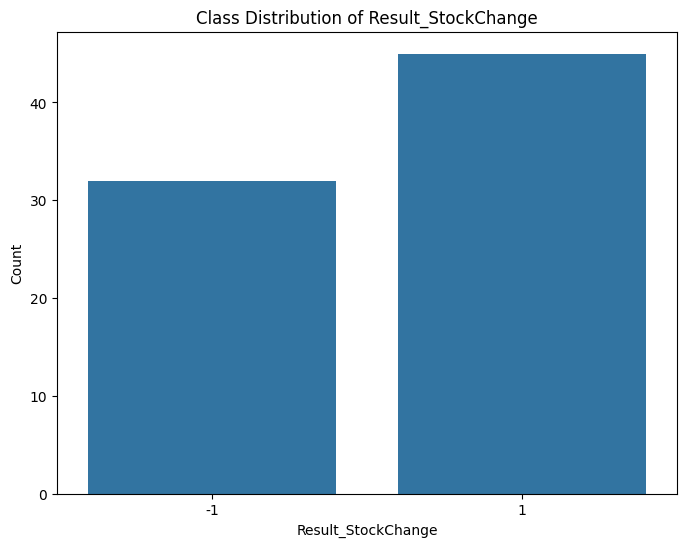

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mean_sentiment_by_date_VADER-Stem_updated.csv')

# Check class distribution
class_distribution = df['Result_StockChange'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Result_StockChange', data=df)
plt.title('Class Distribution of Result_StockChange')
plt.xlabel('Result_StockChange')
plt.ylabel('Count')
plt.show()



TEXTBLOB - STEM dataset


In [57]:
import pandas as pd
from textblob import TextBlob

# Read the uploaded CSV file
uploaded_file_name = "PreProc_Stem_cleaned.csv"
df = pd.read_csv(uploaded_file_name, delimiter=',')

# Function to get TextBlob sentiment polarity for each text
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply TextBlob sentiment analysis to the 'PreProcStem' column and store the results in a new column 'TextBlob_Sentiment'
df['TextBlob_Sentiment'] = df['PreProcStem'].apply(get_textblob_sentiment)

# Save the DataFrame to a new CSV file
textblob_output_file_name = "PreProc_Stem_Textblob.csv"
df.to_csv(textblob_output_file_name, index=False)

# Display the first 5 lines of the resulting file
print(f"First 5 lines of {textblob_output_file_name}:")
with open(textblob_output_file_name, 'r') as file:
    for i, line in enumerate(file):
        if i < 5:
            print(line.strip())
        else:
            break

First 5 lines of PreProc_Stem_Textblob.csv:
id,created_at,PreProcStem,TextBlob_Sentiment
1,2020-04-09 23:59:51+00:00,kennydegu littl volum with t think could spx trade ,0.0
2,2020-04-09 23:58:55+00:00,es_f achiev target  close fibonacci level momentum still possibl push toward - next week spx spi tradign futur  //tco/wdanc,0.0
3,2020-04-09 23:58:52+00:00,kimblechart silver/gold indic creat one largest bullish revers pattern decad test multi-decad suppor…,0.0
4,2020-04-09 23:58:27+00:00,issaquahfund hedg msft posit close seem get lazi past week,-0.25


TEXTBLOB - Lemmatized dataset

In [58]:
import pandas as pd
from textblob import TextBlob

# Read the uploaded CSV file
uploaded_file_name = "PreProc_Lemm_cleaned.csv"
df = pd.read_csv(uploaded_file_name, delimiter=',')

# Function to get TextBlob sentiment polarity for each text
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply TextBlob sentiment analysis to the 'PreProcStem' column and store the results in a new column 'TextBlob_Sentiment'
df['TextBlob_Sentiment'] = df['PreProcLemm'].apply(get_textblob_sentiment)

# Save the DataFrame to a new CSV file
textblob_output_file_name = "PreProc_Lemm_Textblob.csv"
df.to_csv(textblob_output_file_name, index=False)

# Display the first 5 lines of the resulting file
print(f"First 5 lines of {textblob_output_file_name}:")
with open(textblob_output_file_name, 'r') as file:
    for i, line in enumerate(file):
        if i < 5:
            print(line.strip())
        else:
            break

First 5 lines of PreProc_Lemm_Textblob.csv:
id,created_at,PreProcLemm,TextBlob_Sentiment
1,2020-04-09 23:59:51+00:00,kennydegu little volume with t think could spx trading ,-0.1875
2,2020-04-09 23:58:55+00:00,es_f achieved target  closing fibonacci level momentum still possible push towards - next week spx spy tradign future  //tco/wdanc,0.0
3,2020-04-09 23:58:52+00:00,kimblecharting silver/gold indicator creates one largest bullish reversal pattern decade testing multi-decade suppor…,0.0
4,2020-04-09 23:58:27+00:00,issaquahfunds hedged msft position close seemed getting lazy past week,-0.25


HISTOGRAMA - TextBlob  Stemming

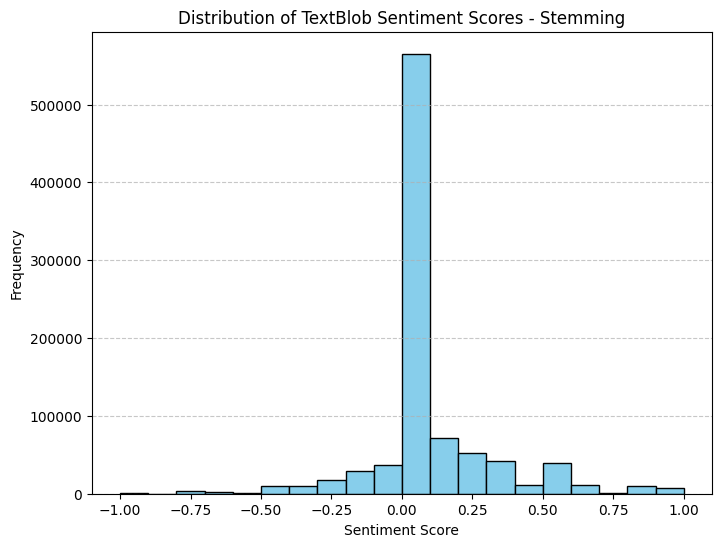

In [60]:
#Sentiment distribution - TextBlob - preprocessed dataset
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path for your TextBlob sentiment analysis results
file_path = "PreProc_Stem_Textblob.csv"

# Try different encodings
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding, delimiter=',')
        break  # If successful, exit the loop
    except pd.errors.ParserError:
        continue

# Plot the distribution of TextBlob sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['TextBlob_Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TextBlob Sentiment Scores - Stemming')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

HISTOGRAM - TextBlob - Lemmatized

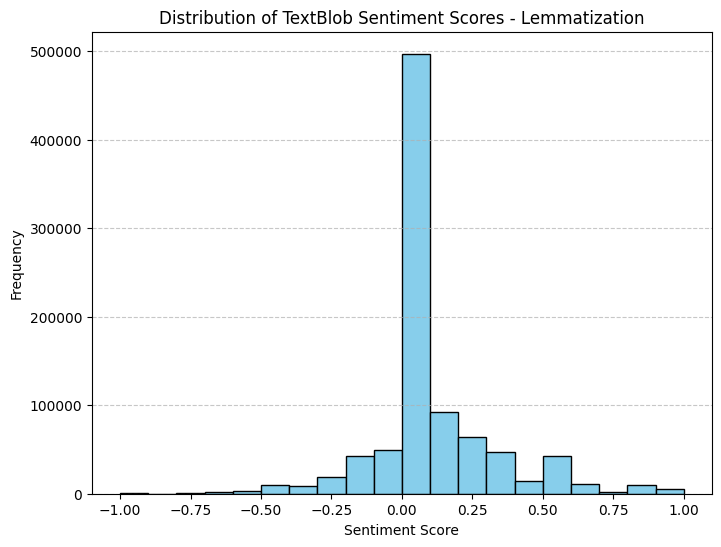

In [61]:
#Sentiment distribution - TextBlob - preprocessed dataset
import pandas as pd
import matplotlib.pyplot as plt

# Specify the file path for your TextBlob sentiment analysis results
file_path = "PreProc_Lemm_Textblob.csv"

# Try different encodings
encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(file_path, encoding=encoding, delimiter=',')
        break  # If successful, exit the loop
    except pd.errors.ParserError:
        continue

# Plot the distribution of TextBlob sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['TextBlob_Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of TextBlob Sentiment Scores - Lemmatization')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Format dates

In [62]:
#Format created_at to bring date yyyy-mm-dd only (no hour) - Stem
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_Textblob.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the date (yyyy-mm-dd) and store it in the 'created_at' column
df['created_at'] = df['created_at'].dt.date

# Save the updated DataFrame back to the CSV file
df.to_csv('PreProc_Stem_Textblob.csv', index=False)

# Print the first 5 lines of the saved file
with open('PreProc_Stem_Textblob.csv', 'r') as file:
    for i in range(5):
        print(file.readline().strip())

id,created_at,PreProcStem,TextBlob_Sentiment
1,2020-04-09,kennydegu littl volum with t think could spx trade ,0.0
2,2020-04-09,es_f achiev target  close fibonacci level momentum still possibl push toward - next week spx spi tradign futur  //tco/wdanc,0.0
3,2020-04-09,kimblechart silver/gold indic creat one largest bullish revers pattern decad test multi-decad suppor…,0.0
4,2020-04-09,issaquahfund hedg msft posit close seem get lazi past week,-0.25


In [63]:
#Format created_at to bring date yyyy-mm-dd only (no hour) - Lemmat
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Lemm_Textblob.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the date (yyyy-mm-dd) and store it in the 'created_at' column
df['created_at'] = df['created_at'].dt.date

# Save the updated DataFrame back to the CSV file
df.to_csv('PreProc_Lemm_Textblob.csv', index=False)

# Print the first 5 lines of the saved file
with open('PreProc_Lemm_Textblob.csv', 'r') as file:
    for i in range(5):
        print(file.readline().strip())

id,created_at,PreProcLemm,TextBlob_Sentiment
1,2020-04-09,kennydegu little volume with t think could spx trading ,-0.1875
2,2020-04-09,es_f achieved target  closing fibonacci level momentum still possible push towards - next week spx spy tradign future  //tco/wdanc,0.0
3,2020-04-09,kimblecharting silver/gold indicator creates one largest bullish reversal pattern decade testing multi-decade suppor…,0.0
4,2020-04-09,issaquahfunds hedged msft position close seemed getting lazy past week,-0.25


Daily Average - TextBlob - Stem

In [64]:
#Daily Average Text_Blob
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_Textblob.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

# Calculate the daily average sentiment score
daily_average_sentiment = df.groupby('created_at')['TextBlob_Sentiment'].mean()

# Find the most frequent sentiment for each day
most_frequent_sentiment = df.groupby('created_at')['TextBlob_Sentiment'].apply(lambda x: x.mode().iloc[0])

# Create a DataFrame with the results
result_df = pd.DataFrame({'Average_Sentiment': daily_average_sentiment, 'Most_Frequent_Sentiment': most_frequent_sentiment})

# Reset the index to have 'created_at' as a regular column
result_df.reset_index(inplace=True)

# Save the resulting DataFrame as 'PreProc_Stem_Textblob_Daily.csv'
result_df.to_csv('PreProc_Stem_Textblob_Daily.csv', index=False)

# Print the result
print(result_df)

    created_at  Average_Sentiment  Most_Frequent_Sentiment
0   2020-04-09           0.071710                      0.0
1   2020-04-10           0.082570                      0.0
2   2020-04-11           0.099481                      0.0
3   2020-04-12           0.088452                      0.0
4   2020-04-13           0.078538                      0.0
..         ...                ...                      ...
72  2020-07-12           0.084934                      0.0
73  2020-07-13           0.091082                      0.0
74  2020-07-14           0.086973                      0.0
75  2020-07-15           0.087932                      0.0
76  2020-07-16           0.093567                      0.0

[77 rows x 3 columns]


Daily Average - TextBlob Lemmatization

In [65]:
#Daily Average Text_Blob LEmm
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Lemm_Textblob.csv')

# Convert the 'created_at' column to a datetime format
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

# Calculate the daily average sentiment score
daily_average_sentiment = df.groupby('created_at')['TextBlob_Sentiment'].mean()

# Find the most frequent sentiment for each day
most_frequent_sentiment = df.groupby('created_at')['TextBlob_Sentiment'].apply(lambda x: x.mode().iloc[0])

# Create a DataFrame with the results
result_df = pd.DataFrame({'Average_Sentiment': daily_average_sentiment, 'Most_Frequent_Sentiment': most_frequent_sentiment})

# Reset the index to have 'created_at' as a regular column
result_df.reset_index(inplace=True)

# Save the resulting DataFrame as 'PreProc_Stem_Textblob_Daily.csv'
result_df.to_csv('PreProc_Lemm_Textblob_Daily.csv', index=False)

# Print the result
print(result_df)

    created_at  Average_Sentiment  Most_Frequent_Sentiment
0   2020-04-09           0.082423                      0.0
1   2020-04-10           0.077754                      0.0
2   2020-04-11           0.106905                      0.0
3   2020-04-12           0.084907                      0.0
4   2020-04-13           0.081796                      0.0
..         ...                ...                      ...
72  2020-07-12           0.093920                      0.0
73  2020-07-13           0.097874                      0.0
74  2020-07-14           0.096365                      0.0
75  2020-07-15           0.105107                      0.0
76  2020-07-16           0.099556                      0.0

[77 rows x 3 columns]


Pie Chart

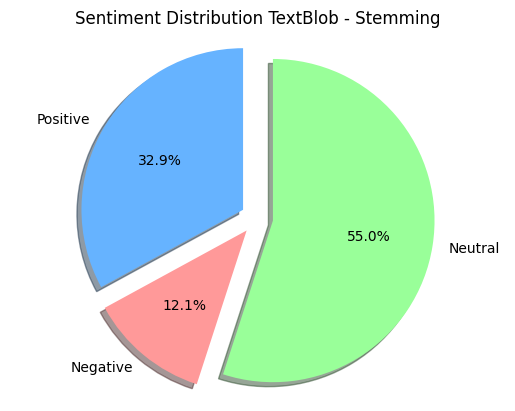

In [67]:
#Pie Chart Daily Average
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Stem_Textblob.csv')

# Extract the TextBlob sentiment scores
textblob_scores = df['TextBlob_Sentiment']

# Determine the sentiment categories based on the TextBlob scores
positive_count = (textblob_scores > 0).sum()
negative_count = (textblob_scores < 0).sum()
neutral_count = (textblob_scores == 0).sum()

# Calculate the percentages
total_count = len(df)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Blue, Red, Green
explode = (0.1, 0.1, 0.1)  # Explode slices

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Sentiment Distribution TextBlob - Stemming')
plt.show()

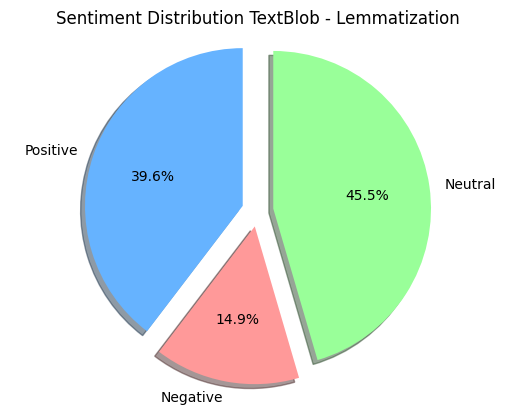

In [68]:
#Pie Chart Daily Average
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('PreProc_Lemm_Textblob.csv')

# Extract the TextBlob sentiment scores
textblob_scores = df['TextBlob_Sentiment']

# Determine the sentiment categories based on the TextBlob scores
positive_count = (textblob_scores > 0).sum()
negative_count = (textblob_scores < 0).sum()
neutral_count = (textblob_scores == 0).sum()

# Calculate the percentages
total_count = len(df)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100

# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_percentage, negative_percentage, neutral_percentage]
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Blue, Red, Green
explode = (0.1, 0.1, 0.1)  # Explode slices

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.title('Sentiment Distribution TextBlob - Lemmatization')
plt.show()

TextBlob - Stem Daily


In [70]:
#code combines data from two different sources (df1 and df2) by adding the 'Result_StockChange'
#column from df1 ("S&P500_2020_Apr_Jul_with_Interpolation.xlsx.") to df2 ("PreProc_Stem_Textblob_Daily.csv.").
#Then, it saves the updated df2 DataFrame to a new CSV file for further
# analysis or storage.
import pandas as pd

# Load the data from both files
df1 = pd.read_excel("S&P500_2020_Apr_Jul_with_Interpolation.xlsx")
df2 = pd.read_csv("PreProc_Stem_Textblob_Daily.csv")

# Copy the 'Result_StockChange' column from df1 to df2
df2['Result_StockChange'] = df1['Result_StockChange']

# Save the updated df2 back to a CSV file
df2.to_csv("mean_sentiment_by_date_TB-Stem_updated.csv", index=False)

TextBlob - Lemm - Daily

In [71]:
#code combines data from two different sources (df1 and df2) by adding the 'Result_StockChange'
#column from df1 ("S&P500_2020_Apr_Jul_with_Interpolation.xlsx.") to df2 ("PreProc_Lemm_textblob_Daily.csv.").
#Then, it saves the updated df2 DataFrame to a new CSV file for further
# analysis or storage.
import pandas as pd

# Load the data from both files
df1 = pd.read_excel("S&P500_2020_Apr_Jul_with_Interpolation.xlsx")
df2 = pd.read_csv("PreProc_Lemm_Textblob_Daily.csv")

# Copy the 'Result_StockChange' column from df1 to df2
df2['Result_StockChange'] = df1['Result_StockChange']

# Save the updated df2 back to a CSV file
df2.to_csv("mean_sentiment_by_date_TB-Lemm_updated.csv", index=False)

SVM - TextBlob - Stem

In [72]:
#Train - TextBlob - Stemming
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mean_sentiment_by_date_TB-Stem_updated.csv')

# Split the dataset into features (X) and the target variable (y)
X = data[['Average_Sentiment']]
y = data['Result_StockChange']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', random_state=42)  # You can choose different kernels based on your data

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)

Accuracy: 0.5625
F1 Score: 0.72
AUC Score: 0.5


SVM - TextBlob - Lemm

In [73]:
#Train - TextBlob - Stemming
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mean_sentiment_by_date_TB-Lemm_updated.csv')

# Split the dataset into features (X) and the target variable (y)
X = data[['Average_Sentiment']]
y = data['Result_StockChange']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear', random_state=42)  # You can choose different kernels based on your data

# Train the SVM classifier on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)

Accuracy: 0.5625
F1 Score: 0.72
AUC Score: 0.5


Logistic Regression - TextBlob - stem

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mean_sentiment_by_date_TB-Stem_updated.csv')

# Split the dataset into features (X) and the target variable (y)
X = data[['Average_Sentiment']]  # Replace with your feature column
y = data['Result_StockChange']  # Replace with your target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(random_state=42)

# Train the logistic regression model on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)


Accuracy: 0.5625
F1 Score: 0.72
AUC Score: 0.5


Logistic Regression TextBlob - Lemm

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('mean_sentiment_by_date_TB-Lemm_updated.csv')

# Split the dataset into features (X) and the target variable (y)
X = data[['Average_Sentiment']]  # Replace with your feature column
y = data['Result_StockChange']  # Replace with your target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(random_state=42)

# Train the logistic regression model on the training data
clf.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model using metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("AUC Score:", roc_auc)


Accuracy: 0.5625
F1 Score: 0.72
AUC Score: 0.5
